In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from utils import data, metrics

In [2]:
FREQ = '1min'
N_DAYS_TEST = 10
PAST_HISTORY = 15
FORCASTING_HORIZON = 5
SCALER = 'MinMax'

# Preprocessing data

In [3]:
df = data.read_dataframe('../data/2020-01-KE.csv')
end_date = df.index.max()
df

,Value
Datetime,
2020-01-01 00:00:00+00:00,191.0
2020-01-01 00:02:00+00:00,190.0
2020-01-01 00:03:00+00:00,188.0
2020-01-01 00:04:00+00:00,188.0
2020-01-01 00:06:00+00:00,188.0
...,...
2020-01-31 23:55:00+00:00,212.0
2020-01-31 23:56:00+00:00,212.0
2020-01-31 23:57:00+00:00,212.0


,Value
Datetime,
2020-01-01 00:00:00+00:00,191.0
2020-01-01 00:01:00+00:00,190.0
2020-01-01 00:02:00+00:00,190.0
2020-01-01 00:03:00+00:00,188.0
2020-01-01 00:04:00+00:00,188.0
...,...
2020-01-31 23:55:00+00:00,212.0
2020-01-31 23:56:00+00:00,212.0
2020-01-31 23:57:00+00:00,212.0


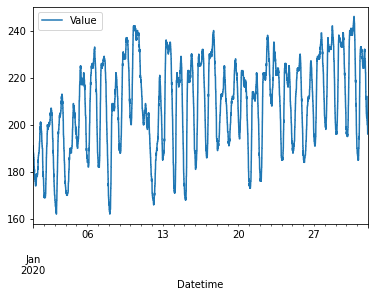

In [4]:
df = data.transform_to_evenly_spaced(df, freq=FREQ)
df.plot()
df

,Value
Datetime,
2020-01-01 00:00:00+00:00,0.3625
2020-01-01 00:01:00+00:00,0.3500
2020-01-01 00:02:00+00:00,0.3500
2020-01-01 00:03:00+00:00,0.3250
2020-01-01 00:04:00+00:00,0.3250
...,...
2020-01-31 23:55:00+00:00,0.6250
2020-01-31 23:56:00+00:00,0.6250
2020-01-31 23:57:00+00:00,0.6250


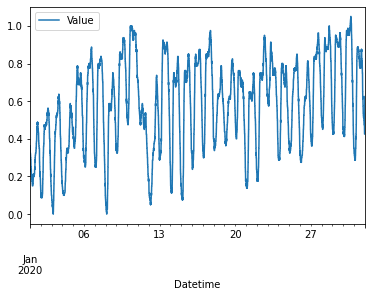

In [5]:
df, scaler = data.scale_features(df, scaler=SCALER, n_days_test=N_DAYS_TEST)
df.plot()
df

In [6]:
df = data.build_features(df, past_history=PAST_HISTORY, forecasting_horizon=FORCASTING_HORIZON)
df

,X_15,X_14,X_13,X_12,X_11,X_10,X_9,X_8,X_7,X_6,X_5,X_4,X_3,X_2,X_1,y_0,y_1,y_2,y_3,y_4
Datetime,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:15:00+00:00,0.3625,0.350,0.350,0.325,0.325,0.325,0.325,0.325,0.325,0.325,0.325,0.325,0.325,0.325,0.325,0.325,0.325,0.325,0.325,0.325
2020-01-01 00:16:00+00:00,0.3500,0.350,0.325,0.325,0.325,0.325,0.325,0.325,0.325,0.325,0.325,0.325,0.325,0.325,0.325,0.325,0.325,0.325,0.325,0.325
2020-01-01 00:17:00+00:00,0.3500,0.325,0.325,0.325,0.325,0.325,0.325,0.325,0.325,0.325,0.325,0.325,0.325,0.325,0.325,0.325,0.325,0.325,0.325,0.325
2020-01-01 00:18:00+00:00,0.3250,0.325,0.325,0.325,0.325,0.325,0.325,0.325,0.325,0.325,0.325,0.325,0.325,0.325,0.325,0.325,0.325,0.325,0.325,0.325
2020-01-01 00:19:00+00:00,0.3250,0.325,0.325,0.325,0.325,0.325,0.325,0.325,0.325,0.325,0.325,0.325,0.325,0.325,0.325,0.325,0.325,0.325,0.325,0.325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-31 23:51:00+00:00,0.4250,0.425,0.425,0.425,0.525,0.625,0.625,0.625,0.625,0.625,0.625,0.625,0.625,0.625,0.625,0.625,0.625,0.625,0.625,0.625
2020-01-31 23:52:00+00:00,0.4250,0.425,0.425,0.525,0.625,0.625,0.625,0.625,0.625,0.625,0.625,0.625,0.625,0.625,0.625,0.625,0.625,0.625,0.625,0.625
2020-01-31 23:53:00+00:00,0.4250,0.425,0.525,0.625,0.625,0.625,0.625,0.625,0.625,0.625,0.625,0.625,0.625,0.625,0.625,0.625,0.625,0.625,0.625,0.625


In [7]:
df_train, df_test = data.split_train_test(df, end_date=end_date, n_days_test=N_DAYS_TEST)
print('Train')
display(df_train)
print('Test')
display(df_test)

Train


,X_15,X_14,X_13,X_12,X_11,X_10,X_9,X_8,X_7,X_6,X_5,X_4,X_3,X_2,X_1,y_0,y_1,y_2,y_3,y_4
Datetime,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:15:00+00:00,0.3625,0.350,0.350,0.325,0.325,0.325,0.325,0.325,0.325,0.325,0.325,0.325,0.325,0.325,0.325,0.325,0.3250,0.3250,0.3250,0.3250
2020-01-01 00:16:00+00:00,0.3500,0.350,0.325,0.325,0.325,0.325,0.325,0.325,0.325,0.325,0.325,0.325,0.325,0.325,0.325,0.325,0.3250,0.3250,0.3250,0.3250
2020-01-01 00:17:00+00:00,0.3500,0.325,0.325,0.325,0.325,0.325,0.325,0.325,0.325,0.325,0.325,0.325,0.325,0.325,0.325,0.325,0.3250,0.3250,0.3250,0.3250
2020-01-01 00:18:00+00:00,0.3250,0.325,0.325,0.325,0.325,0.325,0.325,0.325,0.325,0.325,0.325,0.325,0.325,0.325,0.325,0.325,0.3250,0.3250,0.3250,0.3250
2020-01-01 00:19:00+00:00,0.3250,0.325,0.325,0.325,0.325,0.325,0.325,0.325,0.325,0.325,0.325,0.325,0.325,0.325,0.325,0.325,0.3250,0.3250,0.3250,0.3250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-21 23:55:00+00:00,0.2250,0.225,0.225,0.225,0.225,0.225,0.225,0.225,0.225,0.225,0.225,0.225,0.225,0.225,0.225,0.225,0.2250,0.2250,0.2250,0.2250
2020-01-21 23:56:00+00:00,0.2250,0.225,0.225,0.225,0.225,0.225,0.225,0.225,0.225,0.225,0.225,0.225,0.225,0.225,0.225,0.225,0.2250,0.2250,0.2250,0.2125
2020-01-21 23:57:00+00:00,0.2250,0.225,0.225,0.225,0.225,0.225,0.225,0.225,0.225,0.225,0.225,0.225,0.225,0.225,0.225,0.225,0.2250,0.2250,0.2125,0.2000


Test


,X_15,X_14,X_13,X_12,X_11,X_10,X_9,X_8,X_7,X_6,X_5,X_4,X_3,X_2,X_1,y_0,y_1,y_2,y_3,y_4
Datetime,,,,,,,,,,,,,,,,,,,,
2020-01-22 00:00:00+00:00,0.225,0.225,0.225,0.225,0.225,0.225,0.225,0.225,0.225,0.225,0.225,0.2250,0.2250,0.2250,0.2250,0.2125,0.2000,0.2000,0.2000,0.1875
2020-01-22 00:01:00+00:00,0.225,0.225,0.225,0.225,0.225,0.225,0.225,0.225,0.225,0.225,0.225,0.2250,0.2250,0.2250,0.2125,0.2000,0.2000,0.2000,0.1875,0.1875
2020-01-22 00:02:00+00:00,0.225,0.225,0.225,0.225,0.225,0.225,0.225,0.225,0.225,0.225,0.225,0.2250,0.2250,0.2125,0.2000,0.2000,0.2000,0.1875,0.1875,0.1875
2020-01-22 00:03:00+00:00,0.225,0.225,0.225,0.225,0.225,0.225,0.225,0.225,0.225,0.225,0.225,0.2250,0.2125,0.2000,0.2000,0.2000,0.1875,0.1875,0.1875,0.1875
2020-01-22 00:04:00+00:00,0.225,0.225,0.225,0.225,0.225,0.225,0.225,0.225,0.225,0.225,0.225,0.2125,0.2000,0.2000,0.2000,0.1875,0.1875,0.1875,0.1875,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-31 23:51:00+00:00,0.425,0.425,0.425,0.425,0.525,0.625,0.625,0.625,0.625,0.625,0.625,0.6250,0.6250,0.6250,0.6250,0.6250,0.6250,0.6250,0.6250,0.6250
2020-01-31 23:52:00+00:00,0.425,0.425,0.425,0.525,0.625,0.625,0.625,0.625,0.625,0.625,0.625,0.6250,0.6250,0.6250,0.6250,0.6250,0.6250,0.6250,0.6250,0.6250
2020-01-31 23:53:00+00:00,0.425,0.425,0.525,0.625,0.625,0.625,0.625,0.625,0.625,0.625,0.625,0.6250,0.6250,0.6250,0.6250,0.6250,0.6250,0.6250,0.6250,0.6250


# Train model example

In [8]:
def preprocess_data(df_):
    df = df_.copy()
    end_date = df.index.max()
    df = data.transform_to_evenly_spaced(df, freq=FREQ)
    df, scaler = data.scale_features(df, scaler=SCALER, n_days_test=N_DAYS_TEST)
    df = data.build_features(df, past_history=PAST_HISTORY, forecasting_horizon=FORCASTING_HORIZON)
    df_train, df_test = data.split_train_test(df, end_date=end_date, n_days_test=N_DAYS_TEST)
    X_train, y_train = data.split_input_output(df_train)
    X_test, y_test = data.split_input_output(df_test)
    return X_train, y_train, X_test, y_test, scaler, df_test.index


df = data.read_dataframe('../data/2020-01-KE.csv')
X_train, y_train, X_test, y_test, scaler, test_index = preprocess_data(df)
print(f"Train:\n\tX: {X_train.shape}\n\ty: {y_train.shape}\nTest:\n\tX: {X_test.shape}\n\ty: {y_test.shape}\n")

model = RandomForestRegressor(max_depth=2, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

y_pred_unscaled = scaler.inverse_transform(y_pred)
y_test_unscaled = scaler.inverse_transform(y_test)

def evaluate(actual, predicted):
    ans = dict()
    for m in metrics.METRICS:
        ans[m] = metrics.METRICS[m](actual, predicted)
    return ans

errors = [evaluate(y, o) for y, o in zip(y_test_unscaled, y_pred_unscaled)]
errors_all = metrics.evaluate_all(y_test_unscaled ,y_pred_unscaled)
errors_all

Train:
	X: (30225, 15)
	y: (30225, 5)
Test:
	X: (14396, 15)
	y: (14396, 5)



{'wape': 0.02276636243311724,
 'mape': 0.022765364939713838,
 'mse': 34.3333180271697,
 'rmse': 4.984208033313693,
 'mae': 4.969986356644584}